Task 1: Simple Linear Regression 

● Use the scikit-learn library. 

● Load the California Housing Dataset (or any house price dataset). 

● Predict the house price using a single feature (e.g., number of rooms). 

● Train a simple linear regression model. 

● Plot the regression line using matplotlib.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
new_data = data.copy()

In [6]:
median_bedrooms = new_data['total_bedrooms'].median()
new_data['total_bedrooms']=new_data['total_bedrooms'].fillna(median_bedrooms)

In [7]:
new_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
new_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [27]:
X = new_data[['total_rooms']] #Feature must be 2D
y = new_data['median_house_value']
X

,total_rooms
0,880.0
1,7099.0
2,1467.0
3,1274.0
4,1627.0
...,...
20635,1665.0
20636,697.0
20637,2254.0
20638,1860.0


In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
model = LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)

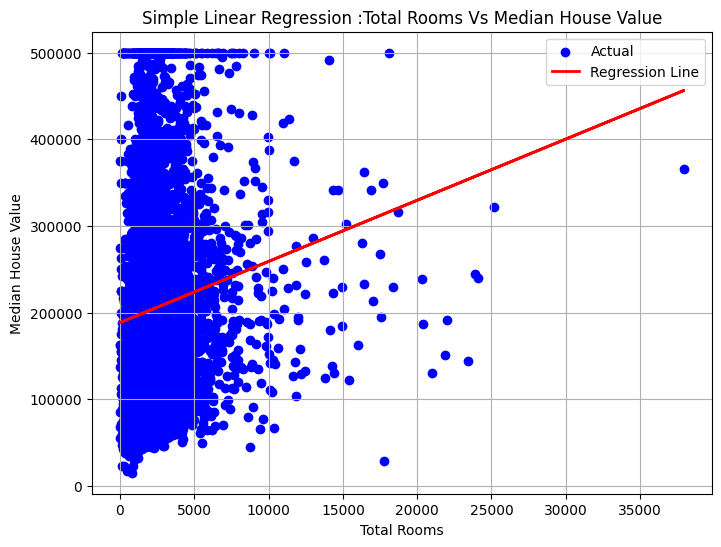

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(x_test,y_test,color = 'blue',label='Actual')
plt.plot(x_test,y_pred,color='red',linewidth=2,label='Regression Line')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.title('Simple Linear Regression :Total Rooms Vs Median House Value')
plt.legend()
plt.grid()

In [43]:
# On Custom Value
rooms = 5000
custom_rooms = [[rooms]]
custom_prediction = model.predict(custom_rooms)
print(f"Predicted median house value for {custom_rooms} total rooms: ${custom_prediction[0]:,.2f}")

Predicted median house value for [[5000]] total rooms: $223,673.02


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Task 2: Multiple Linear Regression 
● Use the same dataset or load another dataset with at least 4 numeric 
features. 

● Predict the target variable using multiple independent variables. 

● Evaluate the model using: 

○ R-squared 
○ Mean Squared Error (MSE) 
○ Root Mean Squared Error (RMSE) 

● Display the coefficients of each feature. 

In [45]:
features = ['housing_median_age','total_rooms','total_bedrooms','median_income']
target = 'median_house_value'

X = new_data[features]
y = new_data[target]

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [48]:
y_pred = model.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [52]:
print("Model Evaluation Metrics")
print(f"R-squared :{r2}")
print(f"MSE :{mse}")
print(f"RMSE :{rmse}")

Model Evaluation Metrics
R-squared :0.5149172505140767
MSE :6356567901.161352
RMSE :79728.0872789593
